# Project Covid
### Exploratory data analysis on infections and development over time (2020-2023), covid cases by top countries, vaccinations vs total cases, which enables further analysis on the development pattern and relationship between vaccination and covid infection rate/ death rate.

In [1]:
import pandas as pd

file = 'coviddata.csv'
df = pd.read_csv(file)
print(df.columns)

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [2]:
# taking variables needed for analysis
df=df[['country','population','continent','date','new_cases','new_deaths','total_cases','total_deaths',
       'people_vaccinated','people_fully_vaccinated','total_vaccinations','new_vaccinations']]
print(df['date'].describe())



count         535365
unique          2114
top       2022-07-31
freq             261
Name: date, dtype: object


### data cleaning to remove summary level data from column country

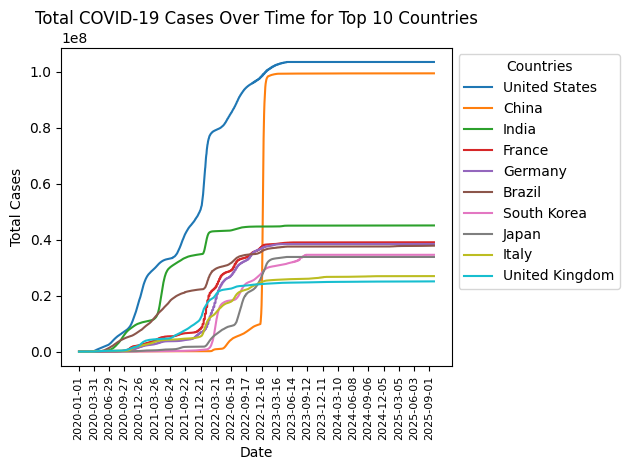

In [3]:
# removing countries that are not countries but continents or world
non_countries = ['World', 'Asia', 'Europe', 'Africa', 'European Union', 'North America', 'South America', 'Oceania', 
                 'International', 'Upper middle income', 'Lower middle income', 'High income', 'Low income', 
                 'Other non-specified areas']
dfclean = df[~df['country'].isin(non_countries)]
# removing countries that contains "World", "countries", "Asia", "excl." in their name
dfclean = dfclean[~dfclean['country'].str.contains('World|countries|Asia|excl.|Union', case=False, na=False)]
# create a loop to plot total cases over time for top 10 countries with highest total cases
for i in dfclean.groupby('country')['total_cases'].max().sort_values(ascending = False).head(10).index:
    dfc = dfclean[dfclean['country'] == i]
    dfc = dfc[['date','total_cases']]
    import matplotlib.pyplot as plt
    plt.plot(dfc['date'],dfc['total_cases'], label=i)
    plt.xticks(rotation=90, fontsize = 8, ticks = range(0, len(dfc['date']),90), labels = dfc['date'][::90])
    plt.legend(title='Countries',loc='upper left',bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.title('Total COVID-19 Cases Over Time for Top 10 Countries')

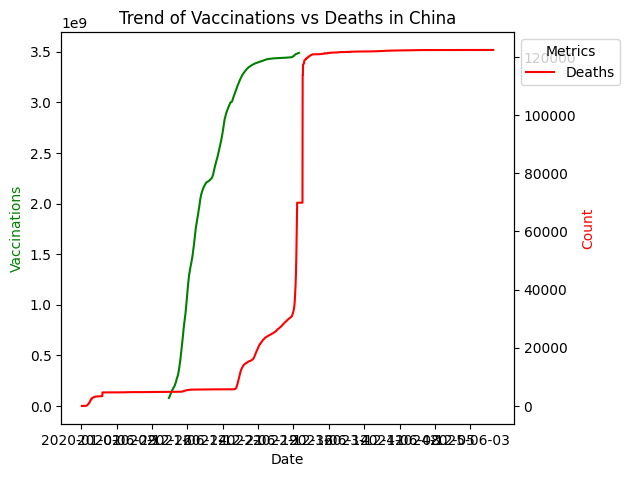

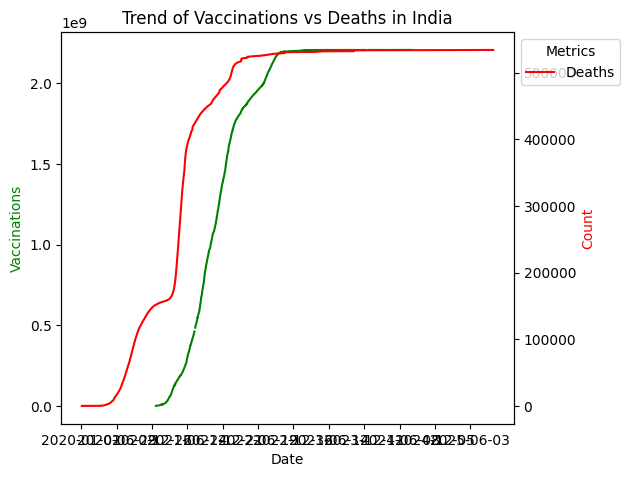

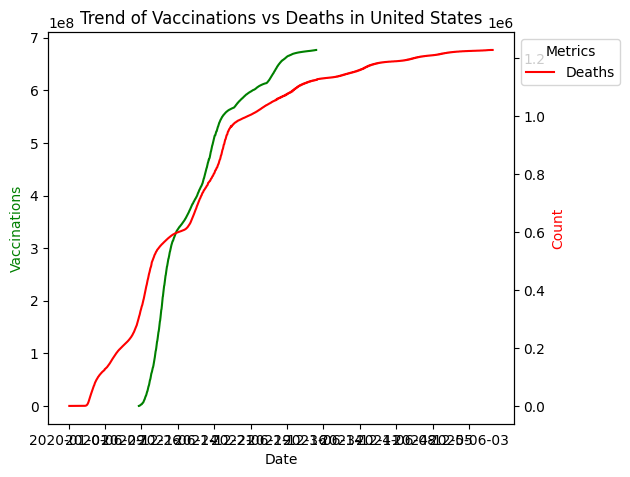

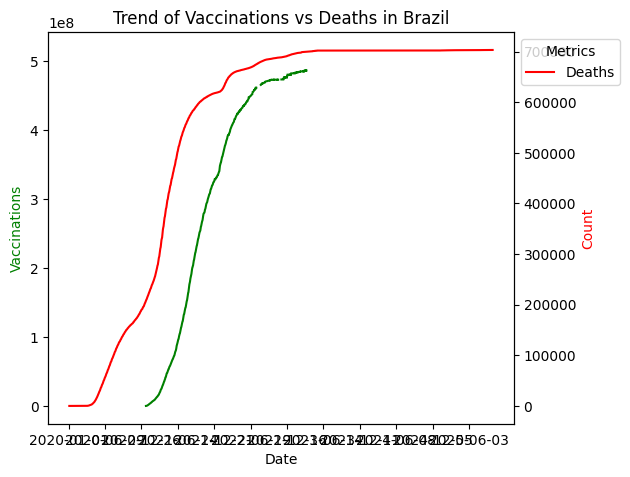

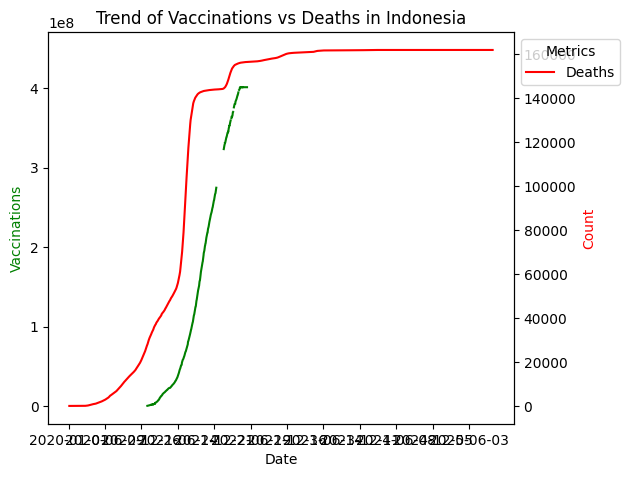

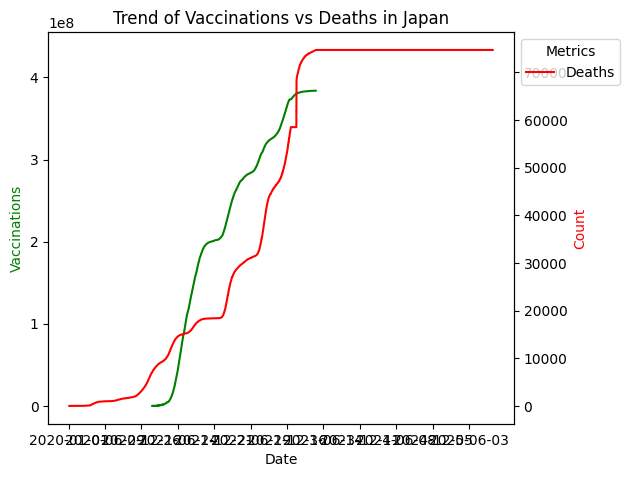

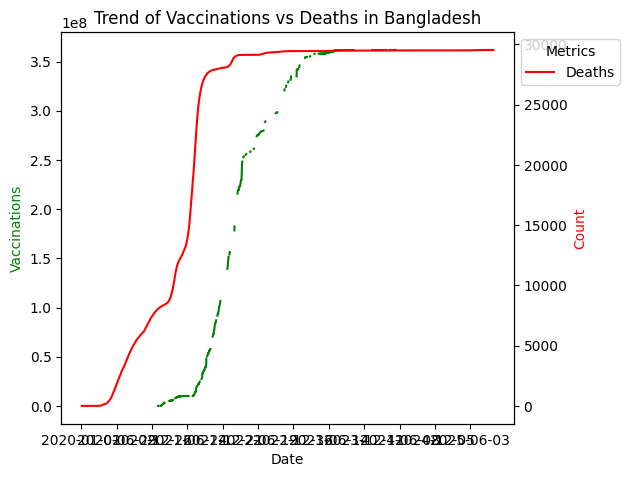

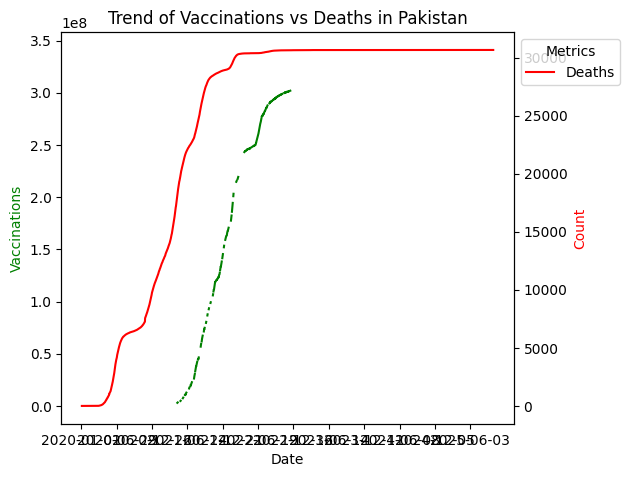

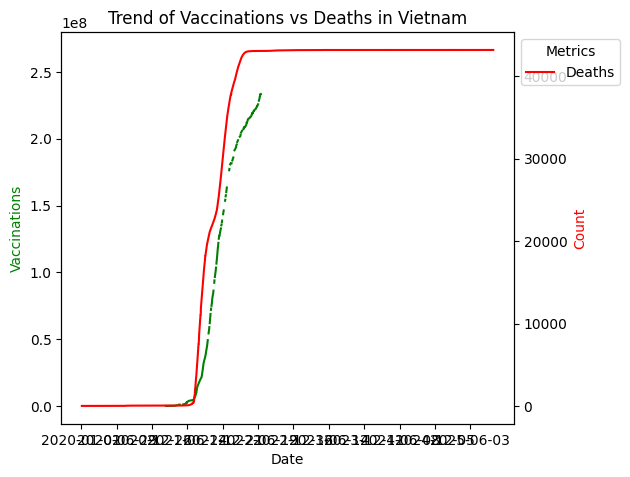

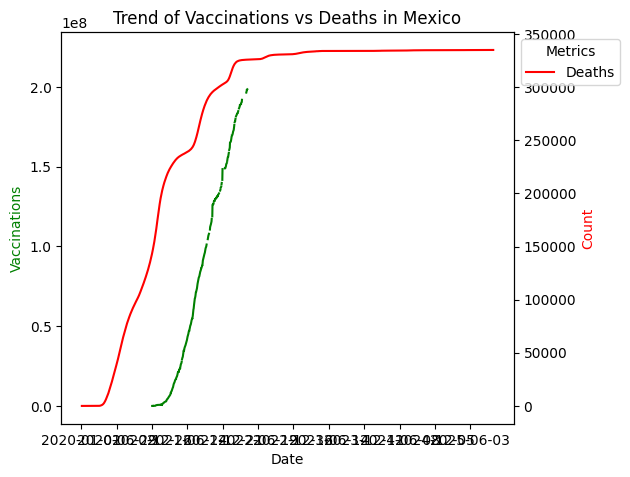

In [4]:
# show trend of vaccinations vs deaths for top 10 countries with highest total vaccinations in dual axis in seperate plots
for i in dfclean.groupby('country')['total_vaccinations'].max().sort_values(ascending=False).head(10).index:
    dfc = dfclean[dfclean['country'] == i]
    dfc = dfc[['date', 'total_vaccinations', 'total_deaths']]
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(dfc['date'], dfc['total_vaccinations'], label='Vaccinations', color='g')
    ax2.plot(dfc['date'], dfc['total_deaths'], label='Deaths', color='r')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Vaccinations', color='g')
    ax2.set_ylabel('Deaths', color='r')
    plt.xticks(rotation=45, fontsize=8, ticks=range(0, len(dfc['date']), 180), labels=dfc['date'][::180])
    plt.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.ylabel('Count')
    plt.title(f'Trend of Vaccinations vs Deaths in {i}')
    plt.show()

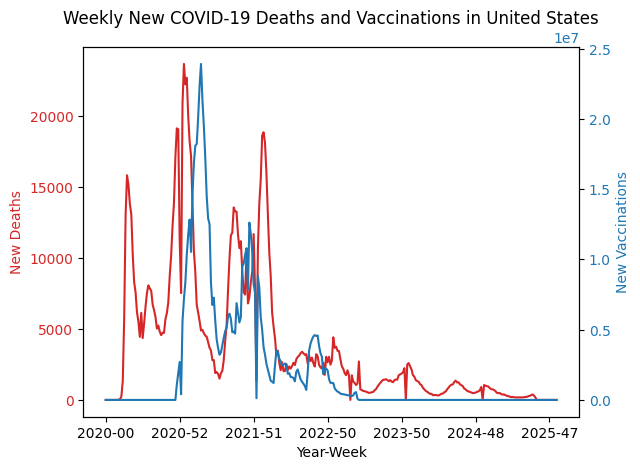

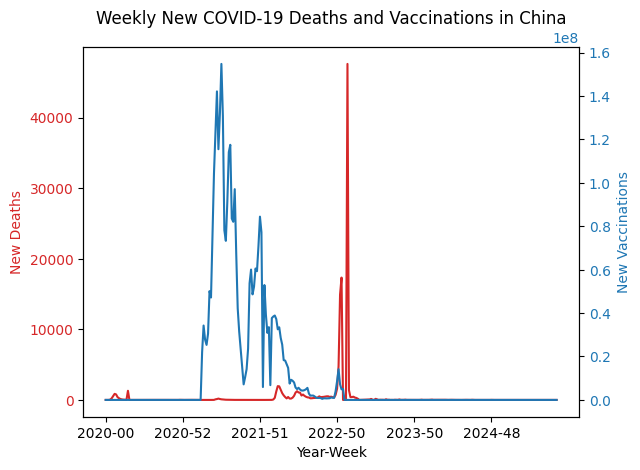

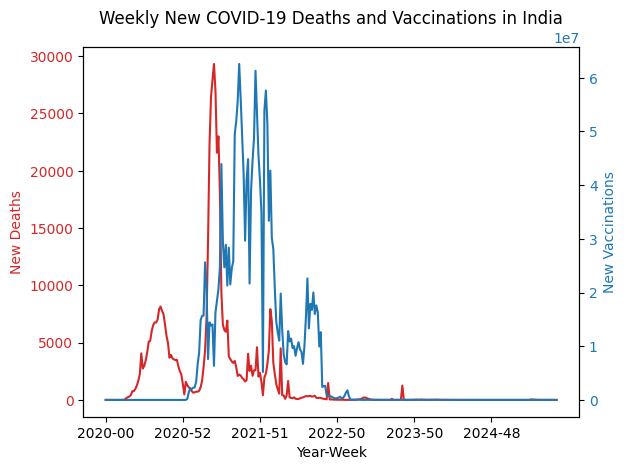

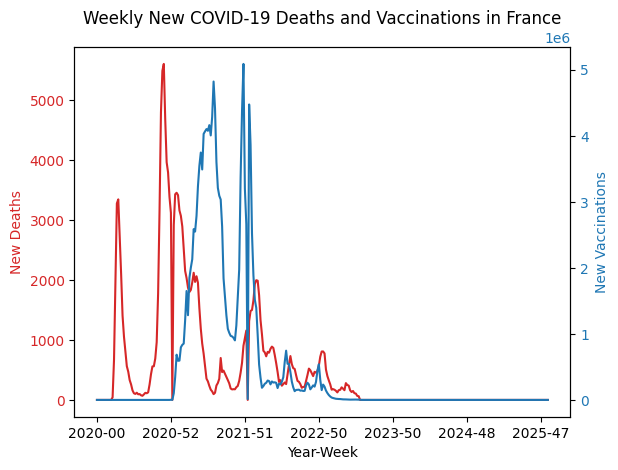

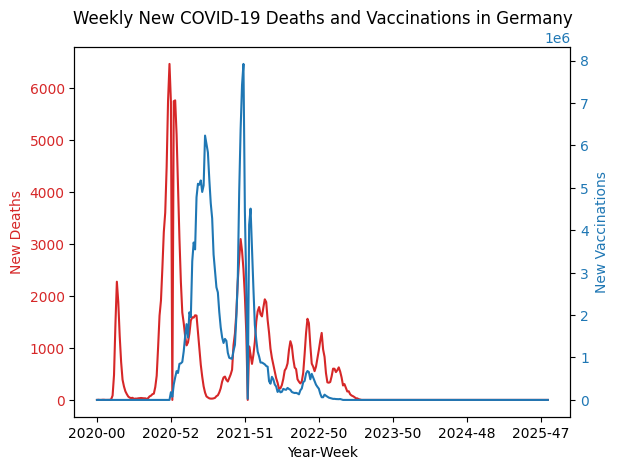

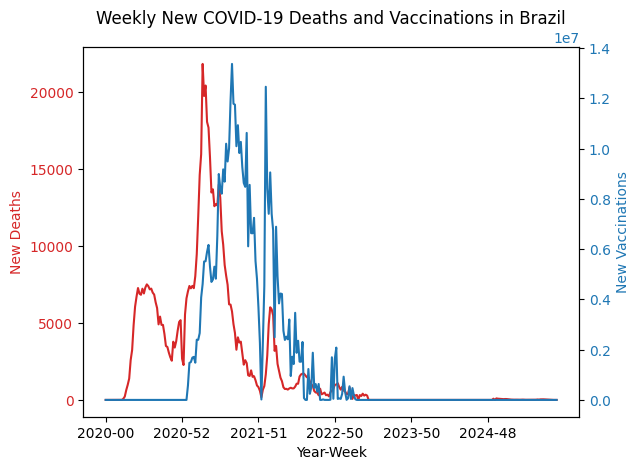

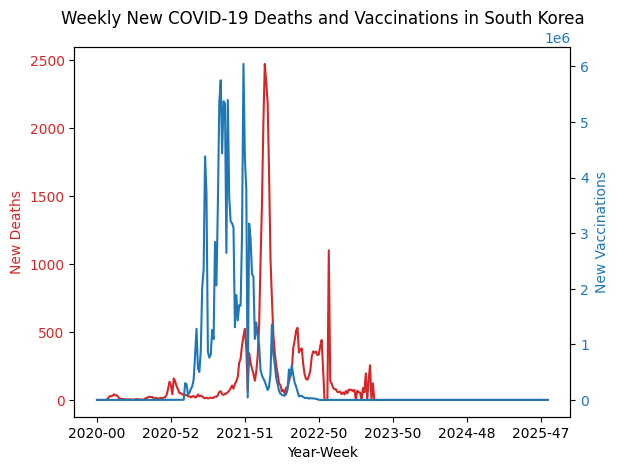

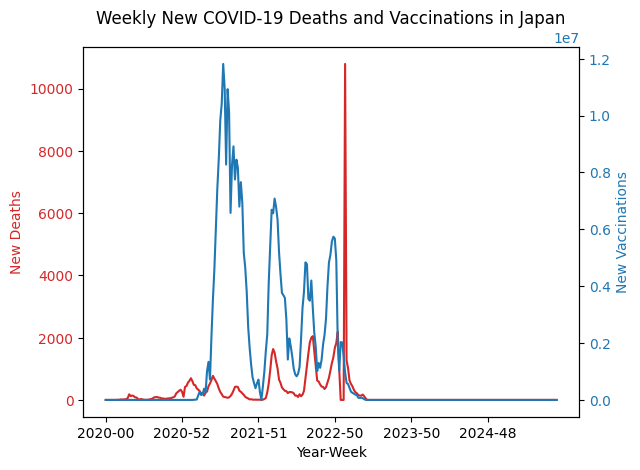

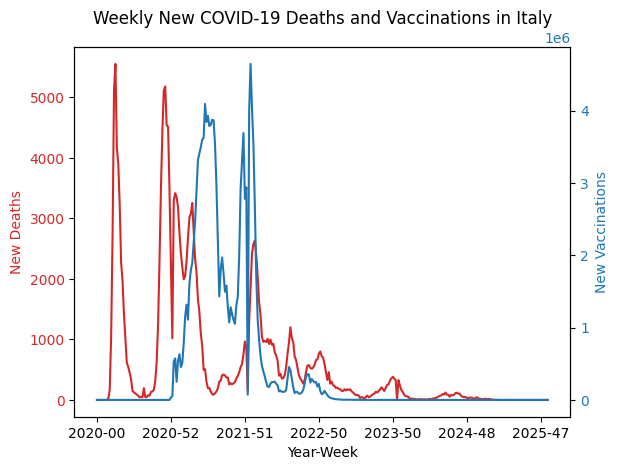

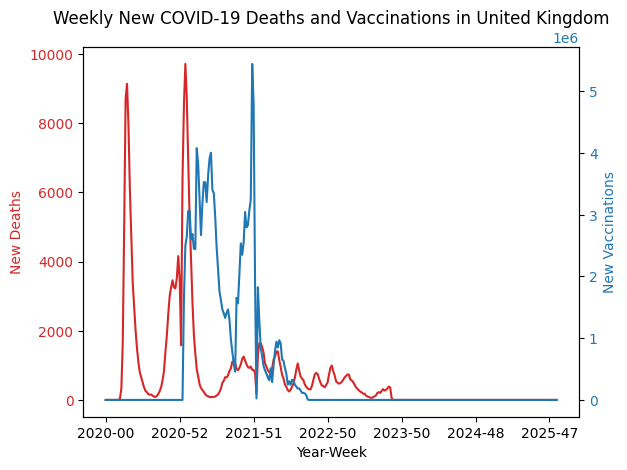

In [6]:
# looking at weekly new deaths vs new vaccinations in dual axis for top countries in total infections in seperate plot, also in year-week format
for i in dfclean.groupby('country')['total_cases'].max().sort_values(ascending = False).head(10).index:
    dfcountry = dfclean[dfclean['country'] == i].copy()
    dfcountry['year_week'] = dfcountry[['date']].apply(lambda x: pd.to_datetime(x['date']).strftime('%Y-%U'), axis=1)
    df_weekly = dfcountry.groupby('year_week').agg({'new_deaths':'sum', 'new_vaccinations':'sum'}).reset_index()
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year-Week')
    ax1.set_ylabel('New Deaths', color=color)
    ax1.plot(df_weekly['year_week'], df_weekly['new_deaths'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('New Vaccinations', color=color)
    ax2.plot(df_weekly['year_week'], df_weekly['new_vaccinations'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title(f'Weekly New COVID-19 Deaths and Vaccinations in {i}')
    plt.xticks(rotation=90, fontsize=8, ticks=range(0, len(df_weekly['year_week']), 52), labels=df_weekly['year_week'][::52])
    plt.show()
dfcountry = df[df['country'] == 'Norway']

